# 다중 숫자 순차열 데이터 분류 Template


# 데이터 준비

In [32]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

In [33]:
numbers = np.zeros((2000,2))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))
numbers[:,1] = np.cos(np.arange(0,1000,0.5))

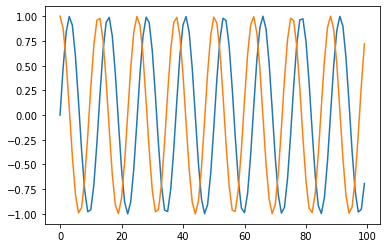

In [34]:
plt.plot(numbers[:100,0])
plt.plot(numbers[:100,1])
plt.show()

In [35]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

[12345678901234567890, 34567890123456789012]의 숫자열 2개로 다음의 입출력 데이터를 생성한다.
```
[12345, 34567] -> T
[23456, 45678] -> F
[34567, 56789] -> T
...
[56789, 78901] -> F
```

In [36]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  next_value0 = numbers[i+SEQUENCE_LENGTH+OFFSET-1,0]
  next_value1 = numbers[i+SEQUENCE_LENGTH+OFFSET-1,1]
  raw_y.append([ int((next_value0+next_value1)>0) ])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x0>   = [3:8] = 45678
#                      v0 = [8]   = 9
# numbers[1] = 34567890123456789012
#                 i = 3
#                 <-x1>   = [3:8] = 67890
#                      v1 = [9]   = 1
#                      y = (v1+v2)>0 = (9+1)>0 = True -> 1



In [37]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [38]:
print(raw_x[0])
print(raw_y[0])

[[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]
[0]


In [39]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 2)
(1994, 1)
Training Data:
(1794, 5, 2)
(1794, 1)
Test Data:
(200, 5, 2)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]

train_y[0]
 [0]


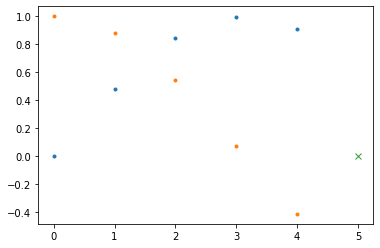

In [40]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.')
plt.plot(train_x[0].T[1], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')

plt.show()

# Template

## LSTM

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               67072     
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


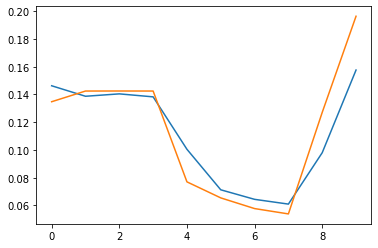

7/7 [==============================] - 0s 3ms/step - loss: 0.1906 - acc: 0.9250
loss= 0.19062037765979767
acc= 0.925000011920929


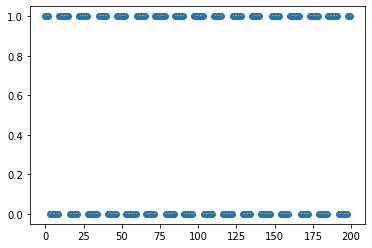

In [41]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## GRU

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50688     
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 258       
Total params: 50,946
Trainable params: 50,946
Non-trainable params: 0
_________________________________________________________________


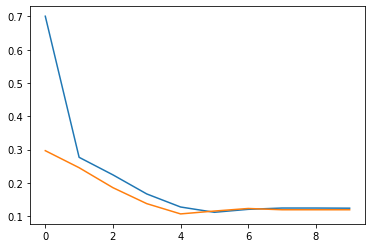

7/7 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9600
loss= 0.12476766854524612
acc= 0.9599999785423279


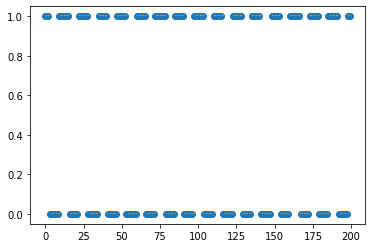

In [42]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## Bidirectional + LSTM

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 256)               134144    
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 514       
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________


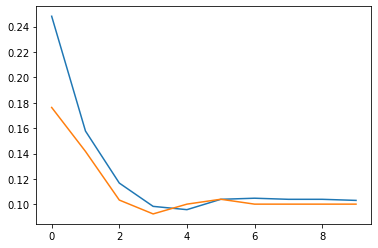

7/7 [==============================] - 0s 4ms/step - loss: 0.1040 - acc: 0.9900
loss= 0.10397318005561829
acc= 0.9900000095367432


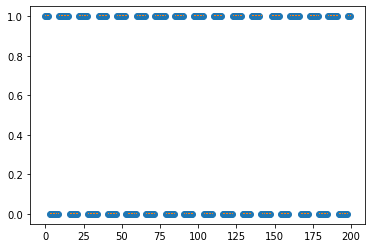

In [43]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## Bidirectional + GRU

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 256)               101376    
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
Total params: 101,890
Trainable params: 101,890
Non-trainable params: 0
_________________________________________________________________


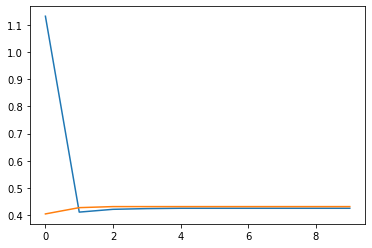

7/7 [==============================] - 0s 3ms/step - loss: 0.4263 - acc: 0.9600
loss= 0.42628583312034607
acc= 0.9599999785423279


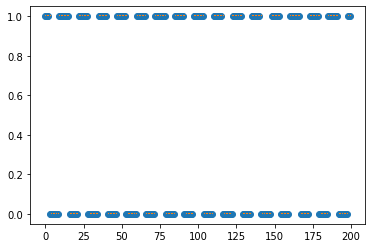

In [44]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## stacked

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5, 128)            67072     
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 258       
Total params: 198,914
Trainable params: 198,914
Non-trainable params: 0
_________________________________________________________________


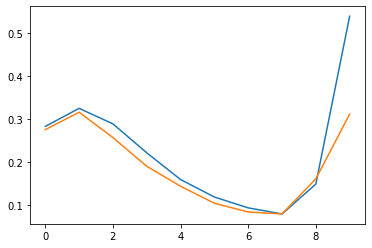

7/7 [==============================] - 0s 3ms/step - loss: 0.3058 - acc: 0.9000
loss= 0.30578455328941345
acc= 0.8999999761581421


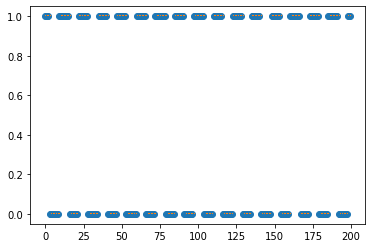

In [45]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## CNN

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 5, 32)             224       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 2, 32)             3104      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)              

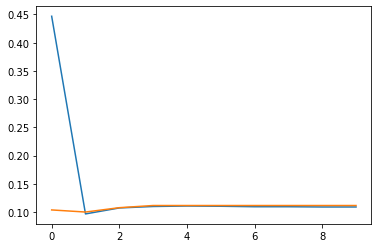

7/7 [==============================] - 0s 2ms/step - loss: 0.1074 - acc: 0.9600
loss= 0.10743852704763412
acc= 0.9599999785423279


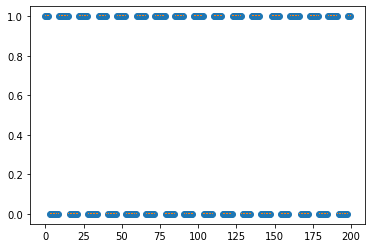

In [46]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## CNN + LSTM

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 5, 32)             224       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 5, 32)             3104      
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               82432     
_________________________________________________________________
flatten_17 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 258       
Total params: 86,018
Trainable params: 86,018
Non-trainable params: 0
_________________________________________________________________


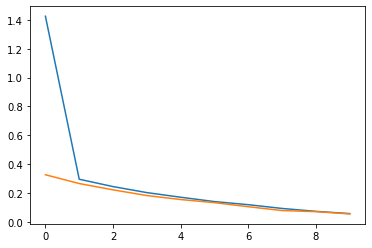

7/7 [==============================] - 0s 3ms/step - loss: 0.0555 - acc: 0.9850
loss= 0.05545246973633766
acc= 0.9850000143051147


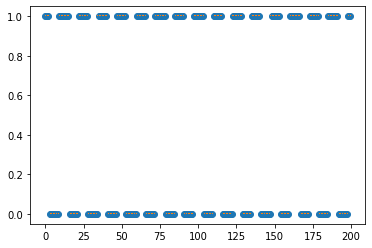

In [47]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()